In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [21]:
df_explo = pd.read_csv("../../../statespace_res.csv")

df_header = pd.read_csv("../../../statespace_header.csv")

In [22]:
df_explo["schedulable"] = df_explo["schedulable"].astype(bool)

In [23]:
df_explo["duration_s"] = df_explo["duration"]/1000

In [24]:
df = df_explo.merge(df_header, left_on="tid", right_on="ts_id")

In [25]:
df["n_task"] = df["nbt"]

In [26]:
error = df.groupby("tid")["schedulable"].apply(lambda x: (x.iloc[0] == x).all())
error.loc[~error]

Series([], Name: schedulable, dtype: bool)

In [27]:
s = df["U"]<0.6
s &= df["schedulable"]==0
df.loc[s]

,tid,search_type,scheduler,safe,unsafe,schedulable,depth,n_visited,duration,duration_s,ts_id,U,nbt,EDFVD_test,n_task


In [28]:
task_palette = sns.color_palette("Set1", int(df["n_task"].unique().shape[0]))

Text(0, 0.5, 'Number of state visited with ACBFS')

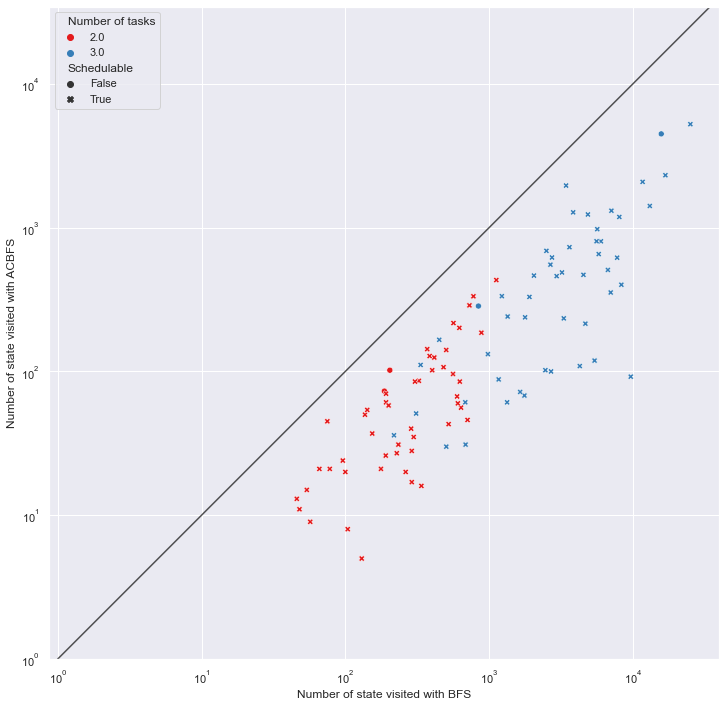

In [29]:
s = df.shape[0] * [True]
df_plot = df.loc[s]
df_piv = df_plot.copy().pivot(index="tid", columns="search_type", values=["duration_s", "n_visited", "schedulable", "nbt"])
df_piv.columns =list(map(lambda x: "_".join(x), df_piv.columns))


df_piv.rename(columns={"nbt_BFS":"Number of tasks"}, inplace=True)
df_piv.rename(columns={"schedulable_ACBFS":"Schedulable"}, inplace=True)

f, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(data=df_piv, x="n_visited_BFS", y="n_visited_ACBFS", style="Schedulable", hue="Number of tasks", ax=ax, palette=task_palette)
ax.set(xscale="log", yscale="log")
ax.axis('equal')

lims = [
    10**0,
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=1)

ax.set(xlim=lims, ylim=lims)

ax.set_xlabel("Number of state visited with BFS")
ax.set_ylabel("Number of state visited with ACBFS")

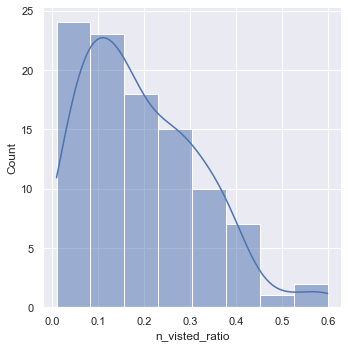

In [30]:
s = df.shape[0] * [True]
df_plot = df.loc[s]
df_piv = df_plot.copy().pivot(index="tid", columns="search_type", values=["duration_s", "n_visited", "schedulable", "nbt"])
df_piv.columns =list(map(lambda x: "_".join(x), df_piv.columns))
df_piv["n_visted_ratio"] = df_piv["n_visited_ACBFS"]/df_piv["n_visited_BFS"]

sns.displot(data=df_piv, x="n_visted_ratio", kde=True)

[(0.0007943282347242813, 0.5979440090519864),
 (0.0007943282347242813, 0.5979440090519864)]

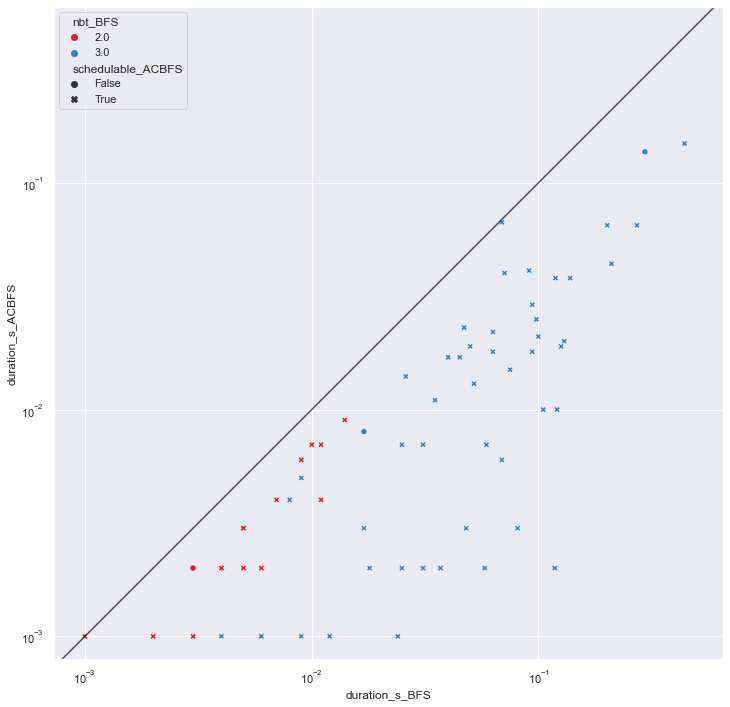

In [31]:
s = df.shape[0] * [True]
df_plot = df.loc[s]
df_piv = df_plot.copy().pivot(index="tid", columns="search_type", values=["duration_s", "n_visited", "schedulable", "nbt"])
df_piv.columns =list(map(lambda x: "_".join(x), df_piv.columns))
df_piv

f, ax = plt.subplots(figsize=(12,12))

sns.scatterplot(data=df_piv, x="duration_s_BFS", y="duration_s_ACBFS", style="schedulable_ACBFS", hue="nbt_BFS", ax=ax, palette=task_palette)
ax.set(xscale="log", yscale="log")
ax.axis('equal')

lims = [
    10**-3.1,
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=1)

ax.set(xlim=lims, ylim=lims)

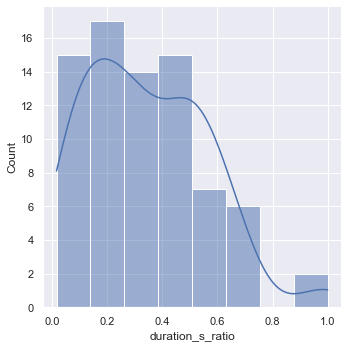

In [32]:
s = df.shape[0] * [True]
df_plot = df.loc[s]
df_piv = df_plot.copy().pivot(index="tid", columns="search_type", values=["duration_s", "n_visited", "schedulable", "nbt"])
df_piv.columns =list(map(lambda x: "_".join(x), df_piv.columns))
df_piv = df_piv.loc[(df_piv["duration_s_ACBFS"]>0) & (df_piv["duration_s_BFS"]>0)]
df_piv["duration_s_ratio"] = df_piv["duration_s_ACBFS"]/df_piv["duration_s_BFS"]

sns.displot(data=df_piv, x="duration_s_ratio", kde=True)

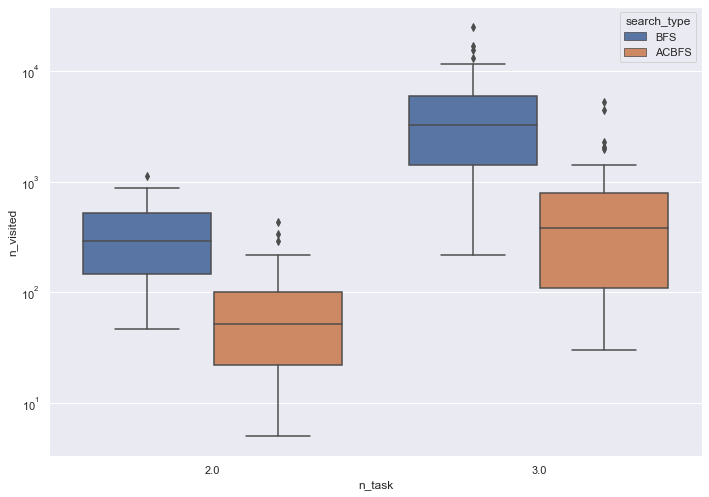

In [33]:
s = df.shape[0] * [True]

df_plot = df.loc[s]

g=sns.boxplot(data=df_plot, y="n_visited", x="n_task", hue="search_type")
g.set_yscale("log")
plt.show()